In [ ]:

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Load the data
data = pd.read_csv('new_synthetic_data_credit_assigned.csv')

# Separate features and target
X = data.drop(columns=['target'])
y = data['target']


transformer = ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(drop='first', handle_unknown='ignore'), # Updated OneHotEncoder initialization
     ['GENDER', 'MARITAL STATUS', 'ARE YOU THE PRIMARY EARNER OF YOUR FAMILY ?',
      'SKILL 1', 'SKILL 2', 'SKILL 3',
      'DO YOU HAVE ANY CERTIFICATION OF THE ABOVE-MENTIONED SKILL SET?',
      'OWNERSHIP ( includes Land,machine)',
      'Relation with primary earner ?']),
    ('tnf2', OrdinalEncoder(categories=[['Class III','Class IV', 'Class V','Class v', 'ClassV', 'Class VI', 'Class VII', 'Class VIII', 'Class IX','HS', 'HSLC', 'BA Ongoing', 'BCom','B Com', 'BA ','BA', 'BSc', 'MSc', 'MCA', 'PhD']]),
     ['WHAT IS YOUR HIGHEST EDUCATIONAL QUALIFICATION?']),

], remainder='passthrough')

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data
X_train_transformed = transformer.fit_transform(X_train)

# Transform the test data
X_test_transformed = transformer.transform(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler with with_mean=False
sc = StandardScaler(with_mean=False)

X_train_transformed = sc.fit_transform(X_train_transformed)
X_test_transformed = sc.transform(X_test_transformed)

In [ ]:
classifier = SVC(kernel = 'sigmoid', random_state = 42)
classifier.fit(X_train_transformed, y_train)

SVC(kernel='sigmoid', random_state=42)

Accuracy on Noisy Data (Noise=0.05): 0.785
Accuracy on Noisy Data (Noise=0.2): 0.785
Accuracy on Noisy Data (Noise=0.4): 0.760
Accuracy on Noisy Data (Noise=0.6): 0.760
Accuracy on Noisy Data (Noise=0.8): 0.780
Accuracy on Noisy Data (Noise=1): 0.720


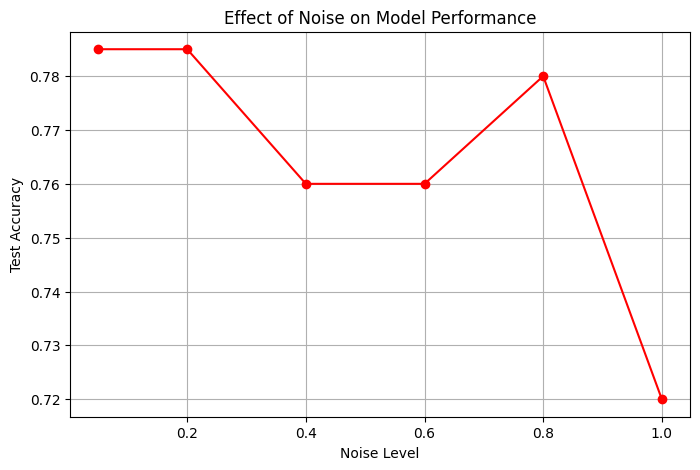

In [ ]:
# 2. Sensitivity to Noisy Data
noise_levels = [0.05, 0.2, 0.4, 0.6, 0.8, 1]
accuracies_noisy_svc = []

for noise in noise_levels:
    X_train_noisy = X_train_transformed.toarray() + np.random.normal(0, noise, X_train_transformed.shape)
    y_train_noisy = y_train.copy()
    random_indices = np.random.choice(y_train_noisy.index, int(0.1 * len(y_train_noisy)), replace=False)
    y_train_noisy.loc[random_indices] ^= 1
    classifier.fit(X_train_noisy, y_train_noisy)
    acc_noisy = accuracy_score(y_test, classifier.predict(X_test_transformed.toarray())) # Changed line
    accuracies_noisy_svc.append(acc_noisy)
    print(f"Accuracy on Noisy Data (Noise={noise}): {acc_noisy:.3f}")

# Plot noise level vs. test accuracy
plt.figure(figsize=(8, 5))
plt.plot(noise_levels, accuracies_noisy_svc, marker='o', linestyle='-', color='r')
plt.xlabel('Noise Level')
plt.ylabel('Test Accuracy')
plt.title('Effect of Noise on Model Performance')
plt.grid()
plt.show()

Training Size: 0.40, Test Accuracy: 0.765
Training Size: 0.45, Test Accuracy: 0.805
Training Size: 0.50, Test Accuracy: 0.795
Training Size: 0.55, Test Accuracy: 0.785
Training Size: 0.60, Test Accuracy: 0.770
Training Size: 0.65, Test Accuracy: 0.785
Training Size: 0.70, Test Accuracy: 0.790
Training Size: 0.75, Test Accuracy: 0.790
Training Size: 0.80, Test Accuracy: 0.795
Training Size: 0.85, Test Accuracy: 0.790
Training Size: 0.90, Test Accuracy: 0.795
Training Size: 0.95, Test Accuracy: 0.790


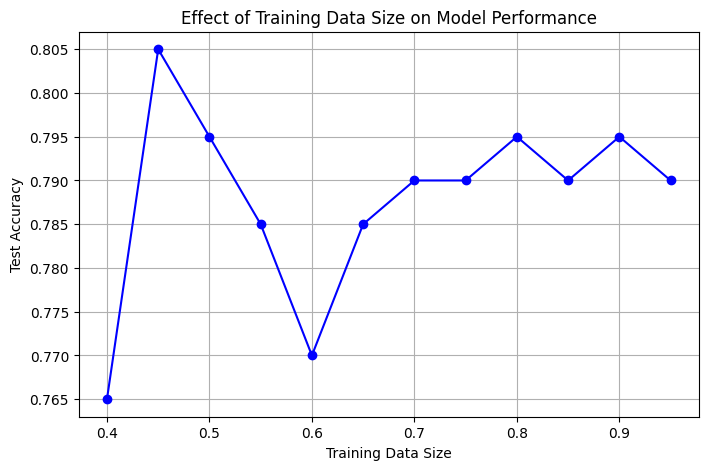

In [ ]:
# 5. Performance with Different Training Data Sizes
train_sizes = np.arange(0.4, 1, 0.05)

accuracies_svc = []

for size in train_sizes:
    X_train_sub, _, y_train_sub, _ = train_test_split(X_train_transformed, y_train, train_size=size, random_state=42)
    classifier.fit(X_train_sub, y_train_sub)
    acc = accuracy_score(y_test, classifier.predict(X_test_transformed))
    accuracies_svc.append(acc)
    print(f"Training Size: {size:.2f}, Test Accuracy: {acc:.3f}")

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, accuracies_svc, marker='o', linestyle='-', color='b')
plt.xlabel('Training Data Size')
plt.ylabel('Test Accuracy')
plt.title('Effect of Training Data Size on Model Performance')
plt.grid()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k_classifier = KNeighborsClassifier(n_neighbors = 15,p=1)
k_classifier.fit(X_train_transformed, y_train)

KNeighborsClassifier(n_neighbors=15, p=1)

Accuracy on Noisy Data (Noise=0.05): 0.700
Accuracy on Noisy Data (Noise=0.2): 0.670
Accuracy on Noisy Data (Noise=0.4): 0.630
Accuracy on Noisy Data (Noise=0.6): 0.660
Accuracy on Noisy Data (Noise=0.8): 0.635
Accuracy on Noisy Data (Noise=1): 0.640


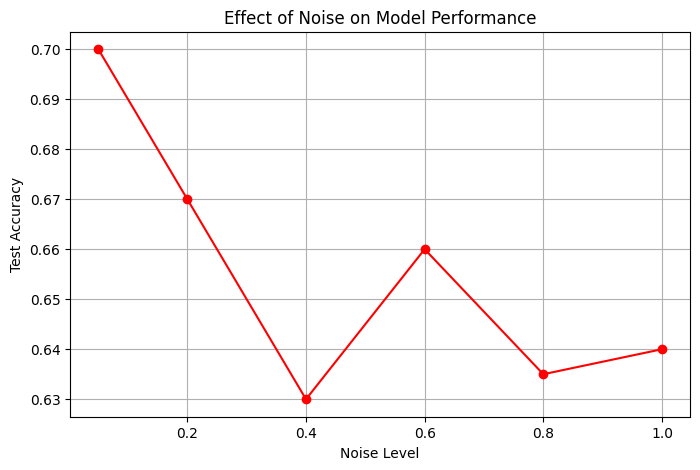

In [ ]:
# 2. Sensitivity to Noisy Data
noise_levels = [0.05, 0.2, 0.4, 0.6, 0.8, 1]
accuracies_noisy_knn = []

for noise in noise_levels:
    X_train_noisy = X_train_transformed.toarray() + np.random.normal(0, noise, X_train_transformed.shape)
    y_train_noisy = y_train.copy()
    random_indices = np.random.choice(y_train_noisy.index, int(0.1 * len(y_train_noisy)), replace=False)
    y_train_noisy.loc[random_indices] ^= 1
    k_classifier.fit(X_train_noisy, y_train_noisy)
    acc_noisy = accuracy_score(y_test, k_classifier.predict(X_test_transformed.toarray())) # Changed line
    accuracies_noisy_knn.append(acc_noisy)
    print(f"Accuracy on Noisy Data (Noise={noise}): {acc_noisy:.3f}")

# Plot noise level vs. test accuracy
plt.figure(figsize=(8, 5))
plt.plot(noise_levels, accuracies_noisy_knn, marker='o', linestyle='-', color='r')
plt.xlabel('Noise Level')
plt.ylabel('Test Accuracy')
plt.title('Effect of Noise on Model Performance')
plt.grid()
plt.show()

Training Size: 0.40, Test Accuracy: 0.640
Training Size: 0.45, Test Accuracy: 0.700
Training Size: 0.50, Test Accuracy: 0.705
Training Size: 0.55, Test Accuracy: 0.690
Training Size: 0.60, Test Accuracy: 0.715
Training Size: 0.65, Test Accuracy: 0.730
Training Size: 0.70, Test Accuracy: 0.720
Training Size: 0.75, Test Accuracy: 0.695
Training Size: 0.80, Test Accuracy: 0.670
Training Size: 0.85, Test Accuracy: 0.695
Training Size: 0.90, Test Accuracy: 0.685
Training Size: 0.95, Test Accuracy: 0.710


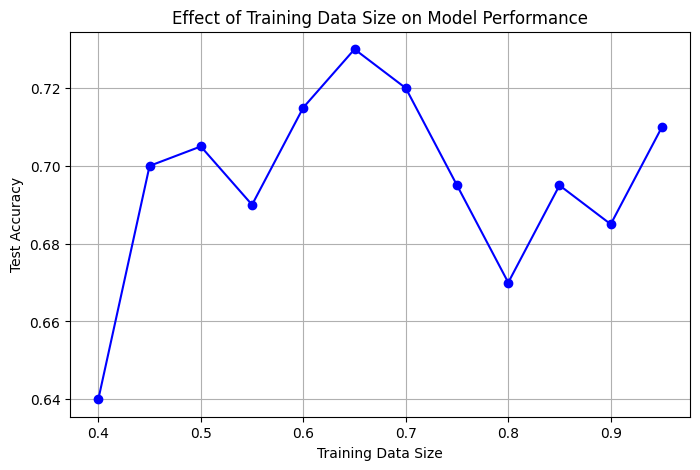

In [ ]:
train_sizes = np.arange(0.4, 1, 0.05)

accuracies_knn = []

for size in train_sizes:
    X_train_sub, _, y_train_sub, _ = train_test_split(X_train_transformed, y_train, train_size=size, random_state=42)
    k_classifier.fit(X_train_sub, y_train_sub)
    acc = accuracy_score(y_test, k_classifier.predict(X_test_transformed))
    accuracies_knn.append(acc)
    print(f"Training Size: {size:.2f}, Test Accuracy: {acc:.3f}")

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, accuracies_knn, marker='o', linestyle='-', color='b')
plt.xlabel('Training Data Size')
plt.ylabel('Test Accuracy')
plt.title('Effect of Training Data Size on Model Performance')
plt.grid()
plt.show()

In [ ]:
rf = RandomForestClassifier(criterion='entropy',max_depth=17,max_features=15,min_samples_leaf=6,n_estimators=50)
rf.fit(X_train_transformed,y_train)
y_pred_train = rf.predict(X_train_transformed)
accuracy_score(y_train, y_pred_train)                             #accuracy on train set

0.97875

Accuracy on Noisy Data (Noise=0.05): 0.935
Accuracy on Noisy Data (Noise=0.2): 0.935
Accuracy on Noisy Data (Noise=0.4): 0.930
Accuracy on Noisy Data (Noise=0.6): 0.850
Accuracy on Noisy Data (Noise=0.8): 0.865
Accuracy on Noisy Data (Noise=1): 0.855


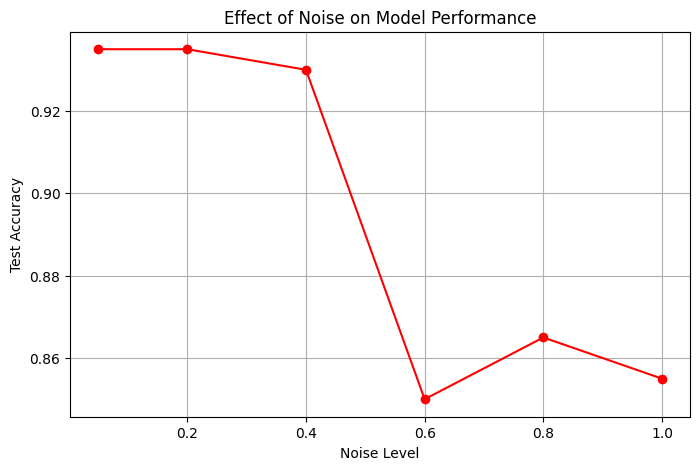

In [ ]:
# 2. Sensitivity to Noisy Data
noise_levels = [0.05, 0.2, 0.4, 0.6, 0.8, 1]
accuracies_noisy_rf = []

for noise in noise_levels:
    X_train_noisy = X_train_transformed.toarray() + np.random.normal(0, noise, X_train_transformed.shape)
    y_train_noisy = y_train.copy()
    random_indices = np.random.choice(y_train_noisy.index, int(0.1 * len(y_train_noisy)), replace=False)
    y_train_noisy.loc[random_indices] ^= 1
    rf.fit(X_train_noisy, y_train_noisy)
    acc_noisy = accuracy_score(y_test, rf.predict(X_test_transformed))
    accuracies_noisy_rf.append(acc_noisy)
    print(f"Accuracy on Noisy Data (Noise={noise}): {acc_noisy:.3f}")

plt.figure(figsize=(8, 5))
plt.plot(noise_levels, accuracies_noisy_rf, marker='o', linestyle='-', color='r')
plt.xlabel('Noise Level')
plt.ylabel('Test Accuracy')
plt.title('Effect of Noise on Model Performance')
plt.grid()
plt.show()

Training Size: 0.40, Test Accuracy: 0.930
Training Size: 0.45, Test Accuracy: 0.930
Training Size: 0.50, Test Accuracy: 0.930
Training Size: 0.55, Test Accuracy: 0.930
Training Size: 0.60, Test Accuracy: 0.935
Training Size: 0.65, Test Accuracy: 0.935
Training Size: 0.70, Test Accuracy: 0.940
Training Size: 0.75, Test Accuracy: 0.940
Training Size: 0.80, Test Accuracy: 0.940
Training Size: 0.85, Test Accuracy: 0.945
Training Size: 0.90, Test Accuracy: 0.945
Training Size: 0.95, Test Accuracy: 0.945


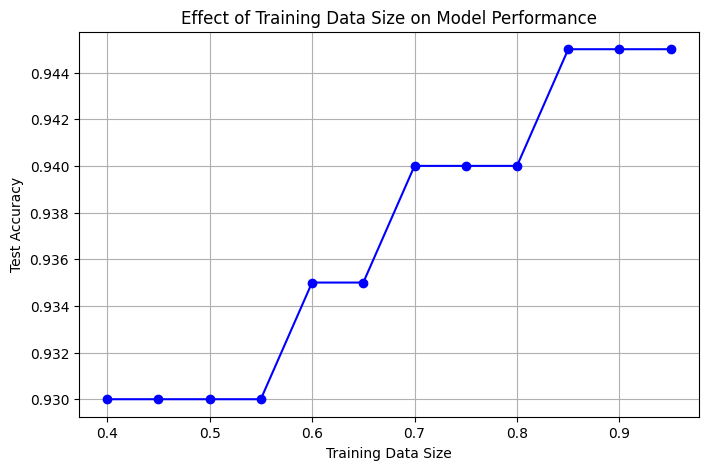

In [ ]:
# 5. Performance with Different Training Data Sizes
train_sizes = np.arange(0.4, 1, 0.05)
accuracies_rf = []

for size in train_sizes:
    X_train_sub, _, y_train_sub, _ = train_test_split(X_train_transformed, y_train, train_size=size, random_state=42)
    rf.fit(X_train_sub, y_train_sub)
    acc = accuracy_score(y_test, rf.predict(X_test_transformed))
    accuracies_rf.append(acc)
    print(f"Training Size: {size:.2f}, Test Accuracy: {acc:.3f}")

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, accuracies_rf, marker='o', linestyle='-', color='b')
plt.xlabel('Training Data Size')
plt.ylabel('Test Accuracy')
plt.title('Effect of Training Data Size on Model Performance')
plt.grid()
plt.show()

In [ ]:
# Train logistic regression model
logreg = LogisticRegression(solver='saga',penalty='l1',C=0.1)
logreg.fit(X_train_transformed, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.1, penalty='l1', solver='saga')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy on Noisy Data (Noise=0.05): 0.815


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy on Noisy Data (Noise=0.2): 0.800


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy on Noisy Data (Noise=0.4): 0.795


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy on Noisy Data (Noise=0.6): 0.820


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy on Noisy Data (Noise=0.8): 0.795
Accuracy on Noisy Data (Noise=1): 0.765


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


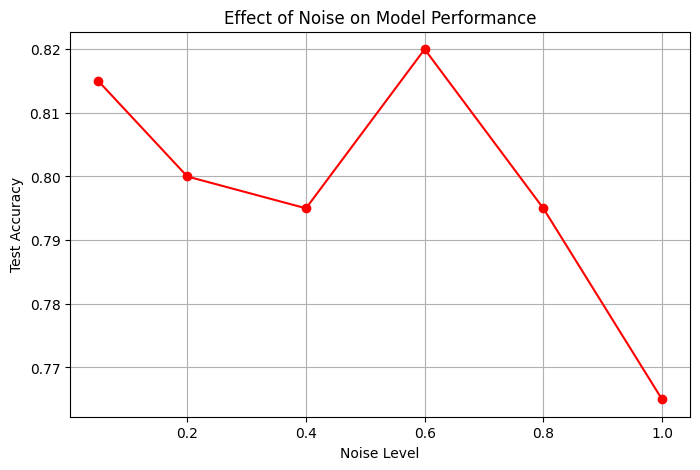

In [ ]:
# 2. Sensitivity to Noisy Data
noise_levels = [0.05, 0.2, 0.4, 0.6, 0.8, 1]
accuracies_noisy_l = []

for noise in noise_levels:
    X_train_noisy = X_train_transformed.toarray() + np.random.normal(0, noise, X_train_transformed.shape)
    y_train_noisy = y_train.copy()
    random_indices = np.random.choice(y_train_noisy.index, int(0.1 * len(y_train_noisy)), replace=False)
    y_train_noisy.loc[random_indices] ^= 1
    logreg.fit(X_train_noisy, y_train_noisy)
    acc_noisy = accuracy_score(y_test, logreg.predict(X_test_transformed.toarray())) # Changed line
    accuracies_noisy_l.append(acc_noisy)
    print(f"Accuracy on Noisy Data (Noise={noise}): {acc_noisy:.3f}")

# Plot noise level vs. test accuracy
plt.figure(figsize=(8, 5))
plt.plot(noise_levels, accuracies_noisy_l, marker='o', linestyle='-', color='r')
plt.xlabel('Noise Level')
plt.ylabel('Test Accuracy')
plt.title('Effect of Noise on Model Performance')
plt.grid()
plt.show()

Training Size: 0.40, Test Accuracy: 0.795
Training Size: 0.45, Test Accuracy: 0.800
Training Size: 0.50, Test Accuracy: 0.780
Training Size: 0.55, Test Accuracy: 0.810
Training Size: 0.60, Test Accuracy: 0.805
Training Size: 0.65, Test Accuracy: 0.805
Training Size: 0.70, Test Accuracy: 0.800
Training Size: 0.75, Test Accuracy: 0.805
Training Size: 0.80, Test Accuracy: 0.780
Training Size: 0.85, Test Accuracy: 0.795
Training Size: 0.90, Test Accuracy: 0.800
Training Size: 0.95, Test Accuracy: 0.790


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


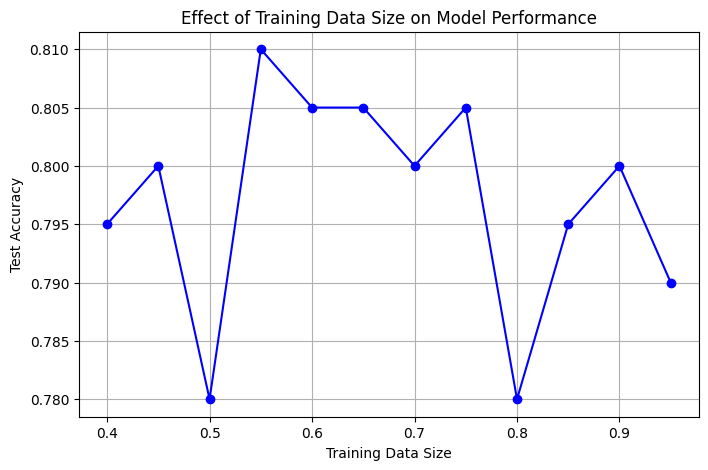

In [ ]:
# 5. Performance with Different Training Data Sizes
train_sizes = np.arange(0.4, 1, 0.05)

accuracies_l = []

for size in train_sizes:
    X_train_sub, _, y_train_sub, _ = train_test_split(X_train_transformed, y_train, train_size=size, random_state=42)
    logreg.fit(X_train_sub, y_train_sub)
    acc = accuracy_score(y_test, logreg.predict(X_test_transformed))
    accuracies_l.append(acc)
    print(f"Training Size: {size:.2f}, Test Accuracy: {acc:.3f}")

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, accuracies_l, marker='o', linestyle='-', color='b')
plt.xlabel('Training Data Size')
plt.ylabel('Test Accuracy')
plt.title('Effect of Training Data Size on Model Performance')
plt.grid()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

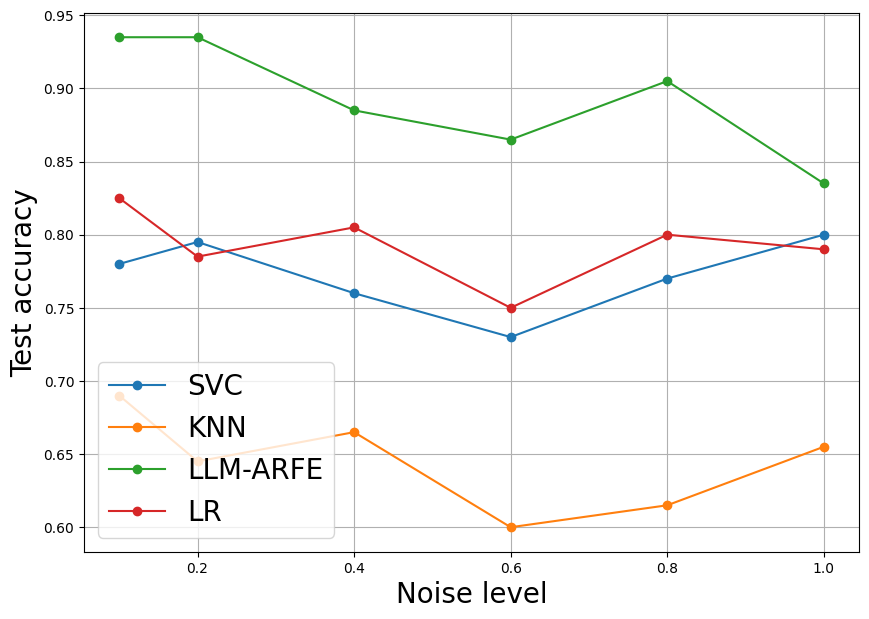

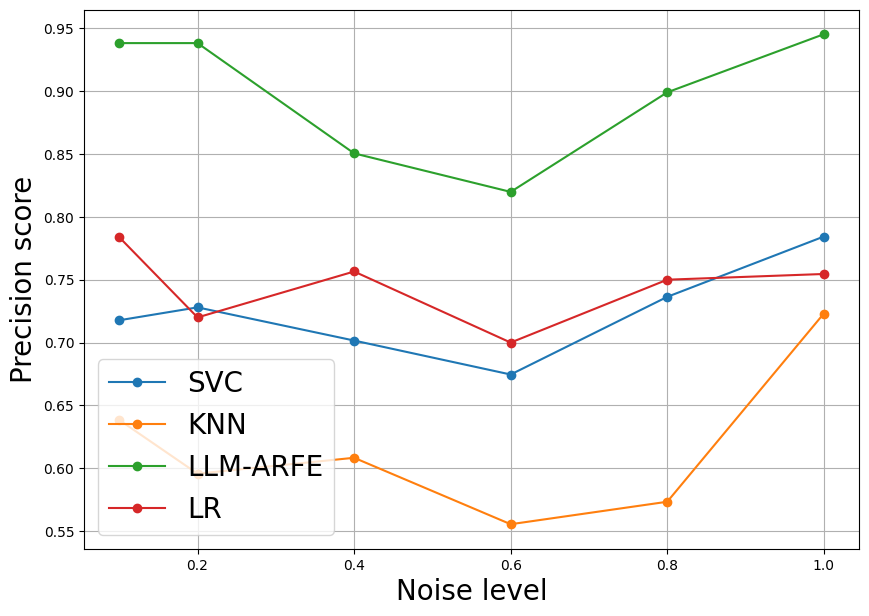

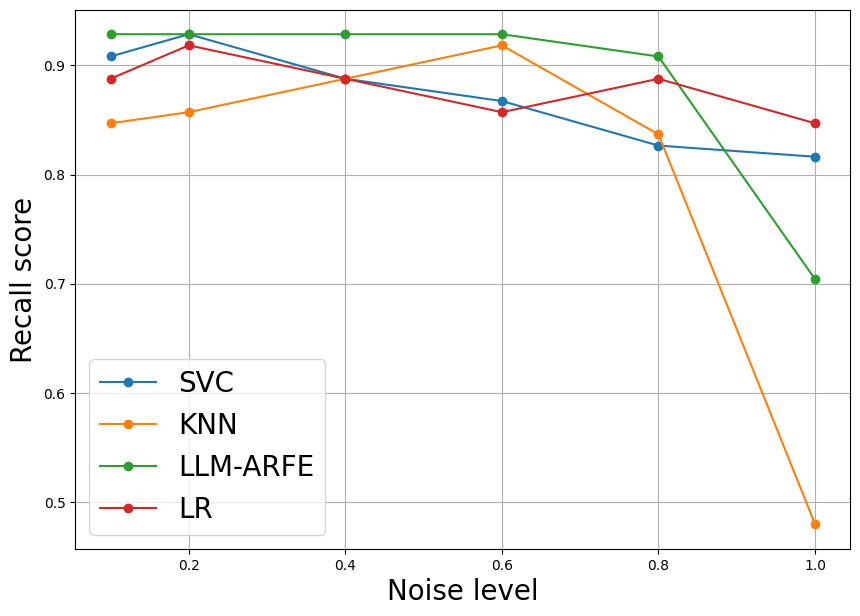

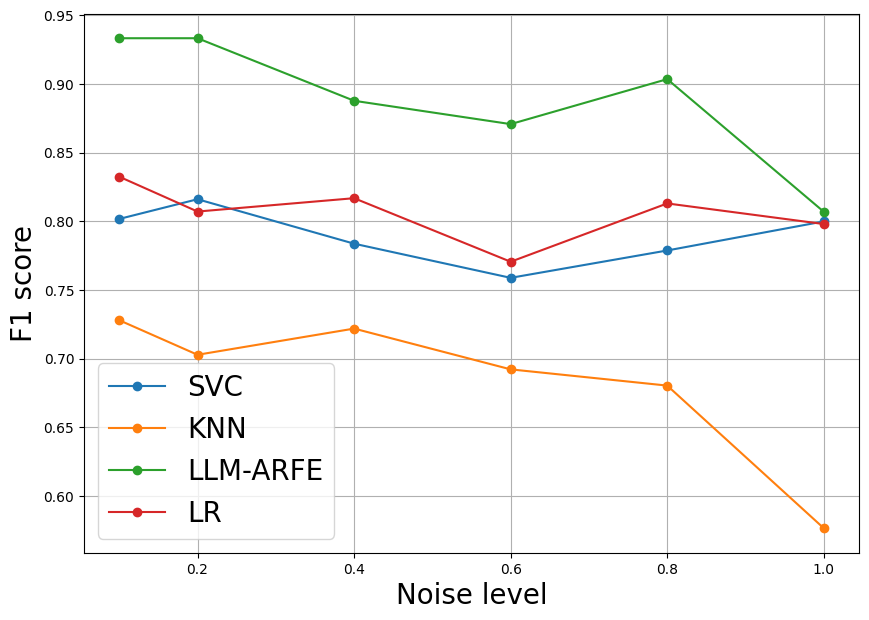

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

noise_levels = [0.1, 0.2, 0.4, 0.6, 0.8, 1]

metrics = {
    "SVC": {"accuracy": [], "precision": [], "recall": [], "f1": []},
    "KNN": {"accuracy": [], "precision": [], "recall": [], "f1": []},
    "LLM-ARFE": {"accuracy": [], "precision": [], "recall": [], "f1": []},
    "LR": {"accuracy": [], "precision": [], "recall": [], "f1": []},
}

for noise in noise_levels:
    # Add noise to X_train
    X_train_noisy = X_train_transformed.toarray() + np.random.normal(0, noise, X_train_transformed.shape)
    y_train_noisy = y_train.copy()

    # Flip 10% of labels
    random_indices = np.random.choice(y_train_noisy.index, int(0.1 * len(y_train_noisy)), replace=False)
    y_train_noisy.loc[random_indices] ^= 1

    models = {
        "SVC": classifier,
        "KNN": k_classifier,
        "LLM-ARFE": rf,
        "LR": logreg,
    }

    for model_name, model in models.items():
        model.fit(X_train_noisy, y_train_noisy)

        y_pred = model.predict(X_test_transformed.toarray() if model_name != "Proposed ARFE" else X_test_transformed)

        metrics[model_name]["accuracy"].append(accuracy_score(y_test, y_pred))
        metrics[model_name]["precision"].append(precision_score(y_test, y_pred))
        metrics[model_name]["recall"].append(recall_score(y_test, y_pred))
        metrics[model_name]["f1"].append(f1_score(y_test, y_pred))

def plot_metric(metric_name, ylabel):
    plt.figure(figsize=(10, 7))
    for model_name, model_metrics in metrics.items():
        plt.plot(noise_levels, model_metrics[metric_name], marker='o', linestyle='-', label=model_name)
    plt.xlabel("Noise level", fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.legend(loc="lower left", fontsize=20)
    plt.grid(True)
    plt.show()

plot_metric("accuracy", "Test accuracy")
plot_metric("precision", "Precision score")
plot_metric("recall", "Recall score")
plot_metric("f1", "F1 score")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


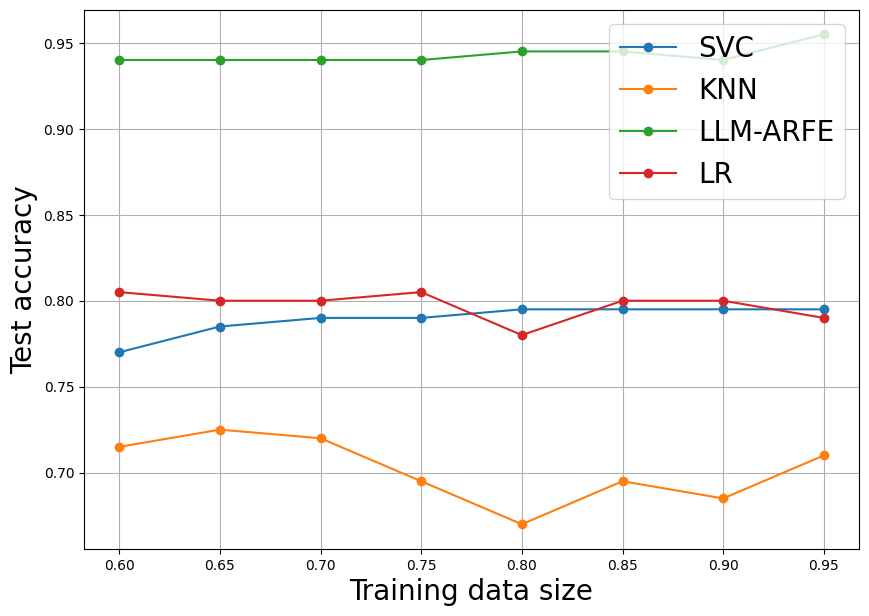

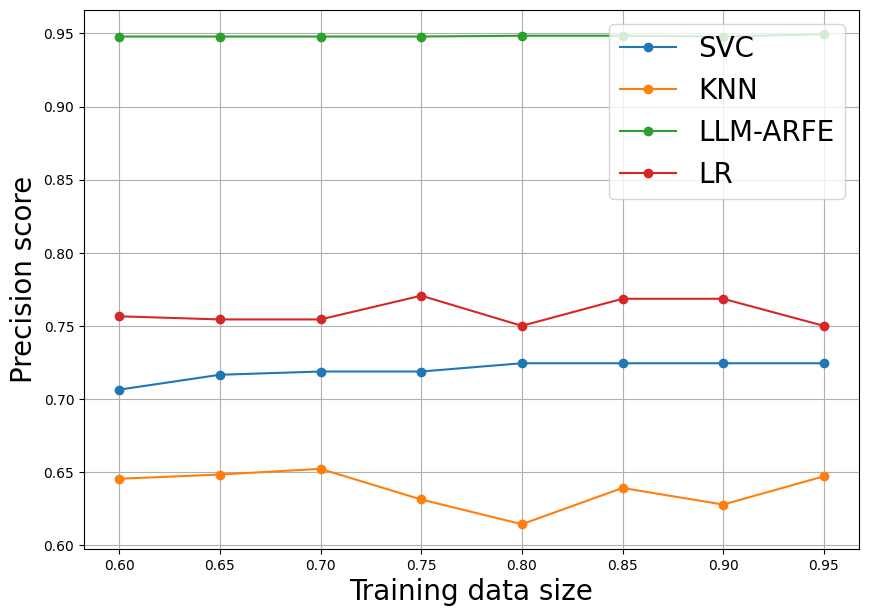

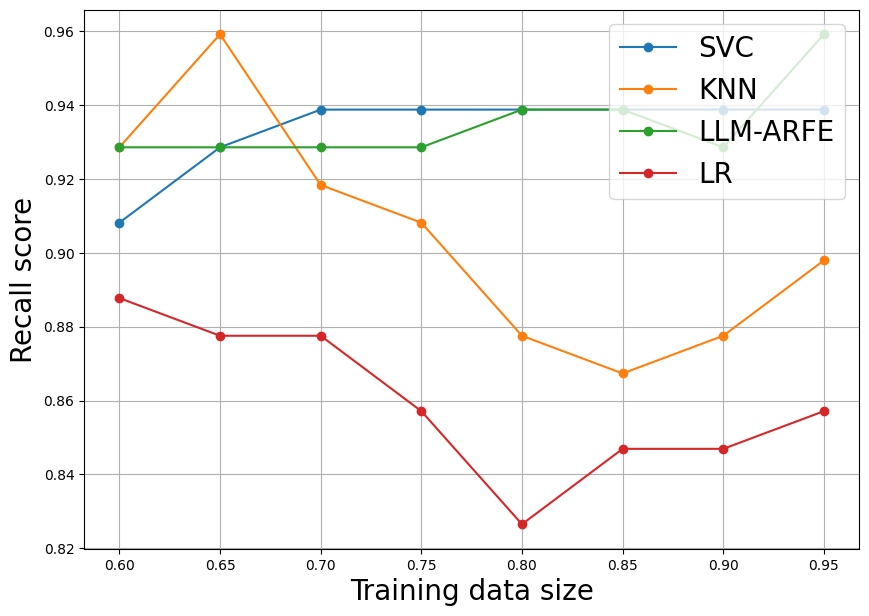

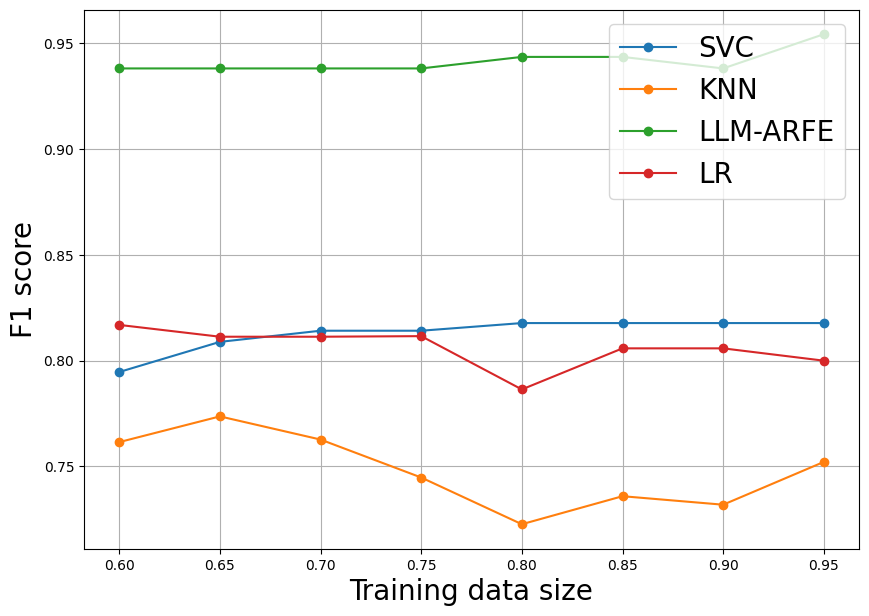

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

train_sizes = np.arange(0.6, 1, 0.05)

metrics = {
    "SVC": {"accuracy": [], "precision": [], "recall": [], "f1": []},
    "KNN": {"accuracy": [], "precision": [], "recall": [], "f1": []},
    "LLM-ARFE": {"accuracy": [], "precision": [], "recall": [], "f1": []},
    "LR": {"accuracy": [], "precision": [], "recall": [], "f1": []},
}

for size in train_sizes:
    # Subset the training data
    X_train_sub, _, y_train_sub, _ = train_test_split(X_train_transformed, y_train, train_size=size, random_state=42)

    models = {
        "SVC": classifier,
        "KNN": k_classifier,
        "LLM-ARFE": rf,
        "LR": logreg,
    }

    for model_name, model in models.items():
        # Train model
        model.fit(X_train_sub, y_train_sub)

        # Predict on test data
        y_pred = model.predict(X_test_transformed)

        # Compute metrics
        metrics[model_name]["accuracy"].append(accuracy_score(y_test, y_pred))
        metrics[model_name]["precision"].append(precision_score(y_test, y_pred))
        metrics[model_name]["recall"].append(recall_score(y_test, y_pred))
        metrics[model_name]["f1"].append(f1_score(y_test, y_pred))

def plot_metric(metric_name, ylabel):
    plt.figure(figsize=(10, 7))
    for model_name, model_metrics in metrics.items():
        plt.plot(train_sizes, model_metrics[metric_name], marker='o', linestyle='-', label=model_name)
    plt.xlabel("Training data size", fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.legend(loc="upper right", fontsize=20)
    plt.grid(True)
    plt.show()

plot_metric("accuracy", "Test accuracy")
plot_metric("precision", "Precision score")
plot_metric("recall", "Recall score")
plot_metric("f1", "F1 score")
